<a href="https://colab.research.google.com/github/RakaiSeto/21_TI-3G-ML/blob/main/JS11_2341720135_Rakai_Seto_Sembodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


# PRAKTIKUM 1

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Membuat Data Dummy

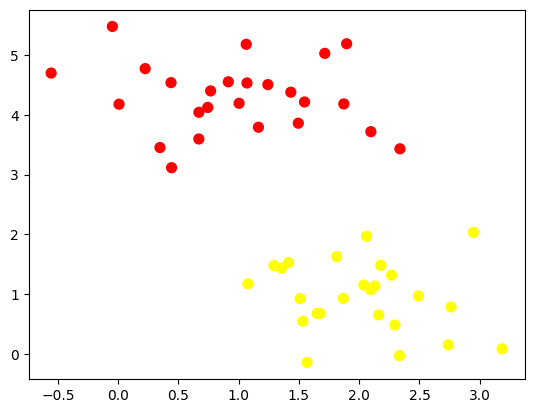

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Buat Ilustrasi Garis Pemisah

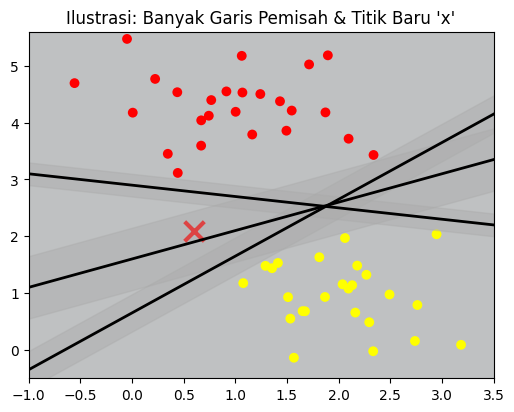

In [4]:
# --- lanjut dari cell kamu ---
plt.figure(figsize=(6, 4.5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='none')

# Titik data baru 'x' (opsional, sesuai ilustrasi awal)
plt.scatter(0.6, 2.1, marker='x', s=200, linewidths=3, c='red')

# Garis + margin (sesuai snippet kamu)
xfit = np.linspace(-1, 3.5, 200)
for m, b, d in [(1.0, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k', linewidth=2)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

# Styling agar mirip contoh
ax = plt.gca()
ax.set_facecolor('#bfc1c2')
plt.xlim(-1, 3.5)
plt.ylim(-0.5, 5.6)
plt.title("Ilustrasi: Banyak Garis Pemisah & Titik Baru 'x'")
plt.show()


## `Ilustrasi Margin`

(-1.0, 3.5)

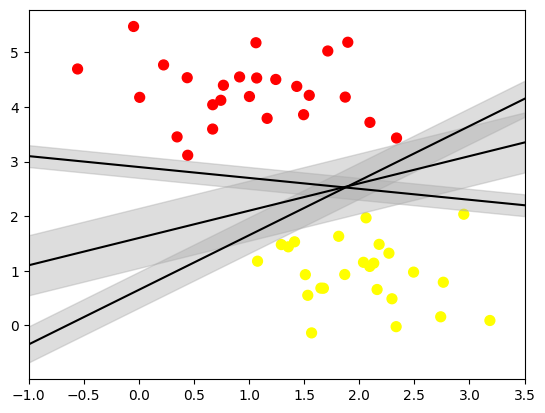

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Fitting Model

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

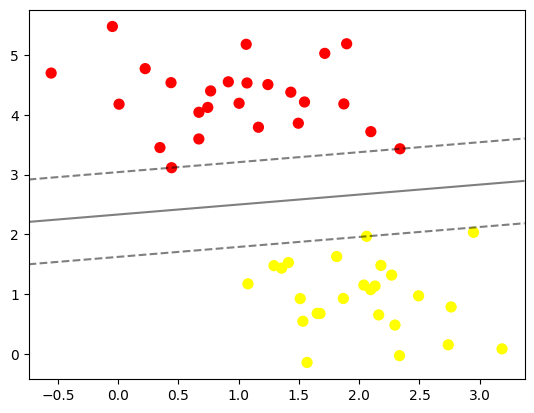

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

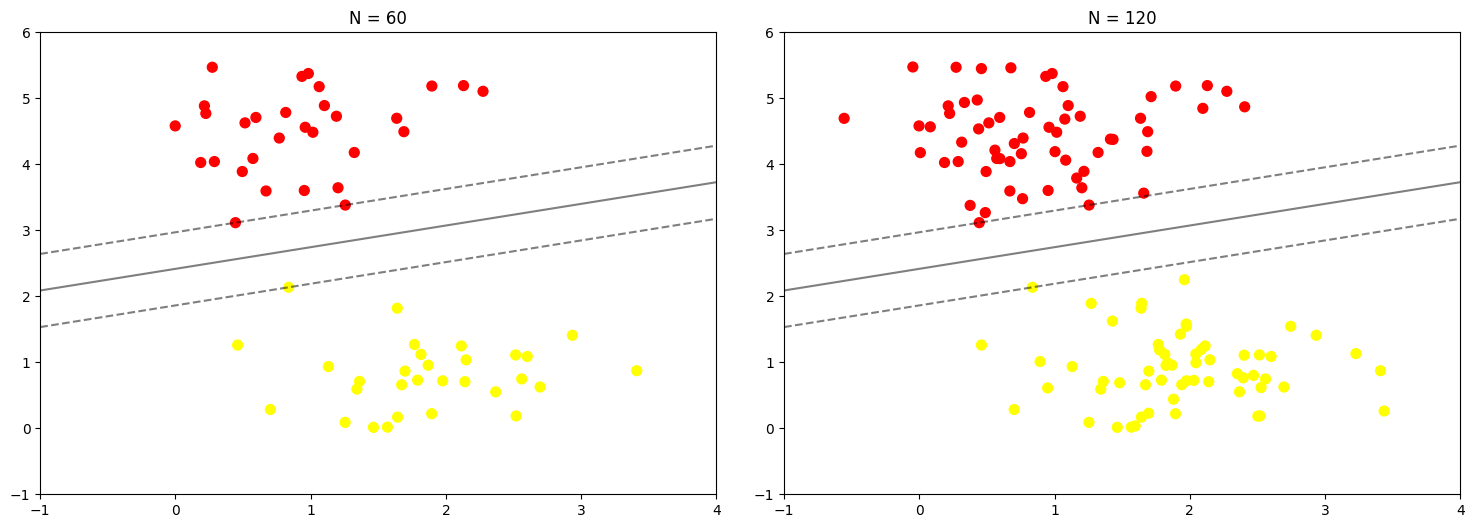

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [11]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# PRAKTIKUM 2

## Ilustrasi Data Non-Linier

### 1a - Import Library

In [12]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### 1b - Buat Kembali Fungsi Plotting

In [13]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1c - Buat Data Dummy Non-Linier

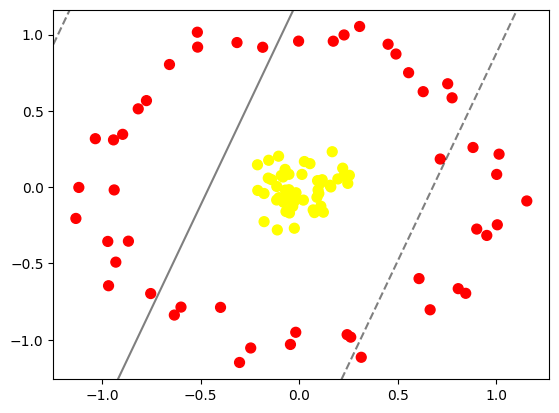

In [14]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [15]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    r = np.exp(-(X ** 2).sum(1)) # Calculate r from X
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.11364983,  0.00466171],
       [ 0.60742925, -0.59916641],
       [ 0.09943317, -0.04121139],
       [-0.09102763,  0.07652106],
       [ 0.3144683 , -1.11500129],
       [-0.6575715 ,  0.8039578 ],
       [ 1.00106438,  0.0836439 ],
       [ 0.05452285,  0.15420726],
       [ 0.17264062,  0.95677541],
       [ 0.24292825, -0.96670559],
       [-0.1020576 , -0.06878056],
       [-0.96640631, -0.64595756],
       [ 0.16733568,  0.23243283],
       [ 0.55459399,  0.75033735],
       [-0.94127849,  0.30991767],
       [-0.10472828, -0.07555481],
       [ 0.71482888,  0.18439315],
       [-0.93784437, -0.01807576],
       [-0.11096289, -0.2801479 ],
       [-0.39879661, -0.78783774],
       [ 1.01310774,  0.21633573],
       [ 1.15368539, -0.09032411],
       [-0.06698966, -0.15951152],
       [-0.92951991, -0.49135378],
       [-0.20994648, -0.02135204],
       [ 0.95090101, -0.31629405],
       [-0.07933763, -0.09890597],
       [-0.51487049,  0.91800344],
       [ 0.84403553, -0.6957101 ],
       [-0.06967206, -0.01923128],
       [ 0.19594101,  0.05397158],
       [-0.01743925, -0.95110253],
       [-0.86573441, -0.35396251],
       [-0.02466586, -0.26900281],
       [ 0.24627519,  0.02483899],
       [ 0.10970253, -0.12478834],
       [-0.15675262,  0.05946914],
       [-0.10453808,  0.20304513],
       [-0.0517639 , -0.01681022],
       [-0.05209225,  0.08425716],
       [-0.59924632, -0.78598257],
       [ 0.12243463, -0.16399796],
       [-0.04442697, -1.03082275],
       [ 0.01392783,  0.08368276],
       [-1.11702319, -0.00173286],
       [-1.13194619, -0.20487317],
       [-0.51627619,  1.01570045],
       [-0.21157567,  0.14677168],
       [ 0.66369964, -0.8036802 ],
       [-0.75277352, -0.69720682],
       [ 0.75276621,  0.67785205],
       [-0.30245064, -1.14899563],
       [ 0.49041826,  0.87270632],
       [-0.77426916,  0.56741596],
       [-0.07128734, -0.06304212],
       [ 0.80614064, -0.66514301],
       [-0.01624241, -0.03659876],
       [ 0.07709   , -0.1664863 ],
       [-0.31531455,  0.94790135],
       [ 0.88102791,  0.26016651],
       [ 0.62846095,  0.62599602],
       [-0.89487915,  0.34632305],
       [-0.9702747 , -0.35564327],
       [ 0.02122612, -0.08477267],
       [-0.11420172, -0.08396837],
       [ 0.11654836,  0.04876584],
       [-0.63295844, -0.83821025],
       [ 0.09566099, -0.01832894],
       [ 0.77491744,  0.58563935],
       [ 0.22052637,  0.12454922],
       [-0.02604978, -0.07550745],
       [-0.81599973,  0.51347863],
       [-0.15466426,  0.17642243],
       [-0.08228912,  0.06670289],
       [ 0.26125072, -0.98300449],
       [ 0.22741946,  0.99772719],
       [ 0.10636095,  0.02518445],
       [-1.03338545,  0.31785559],
       [-0.18511381,  0.91702437],
       [ 0.45057133,  0.93683009],
       [-0.03283347, -0.12590002],
       [ 0.16012058,  0.00152739],
       [ 0.02630434,  0.16801671],
       [-0.17828439, -0.04142784],
       [ 0.22678052,  0.07455363],
       [-0.14086386,  0.04989877],
       [ 0.15641871,  0.01264523],
       [-0.0031051 ,  0.95724141],
       [-0.2457593 , -1.05398481],
       [ 0.2541804 ,  0.07784223],
       [ 0.30626512,  1.05327992],
       [-0.07140356,  0.11641379],
       [ 0.07076943, -0.14890361],
       [ 0.09311377,  0.04280579],
       [ 0.89991226, -0.27465958],
       [-0.02529843, -0.09343871],
       [-0.1780638 , -0.22591222],
       [ 0.09001256, -0.06612339],
       [-0.04923356, -0.16900668],
       [ 1.00417406, -0.24655561]]), y=array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]))>

## Fitting Model

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

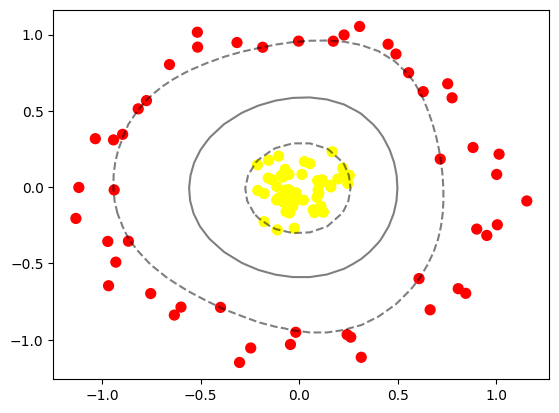

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# Praktikum 3

## Import Library dan Buat Fungsi Plotting

In [22]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [23]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Buat Data Dummy

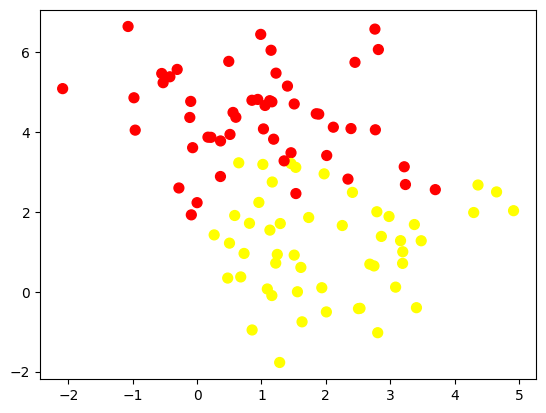

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Analisis Dampak Tunning

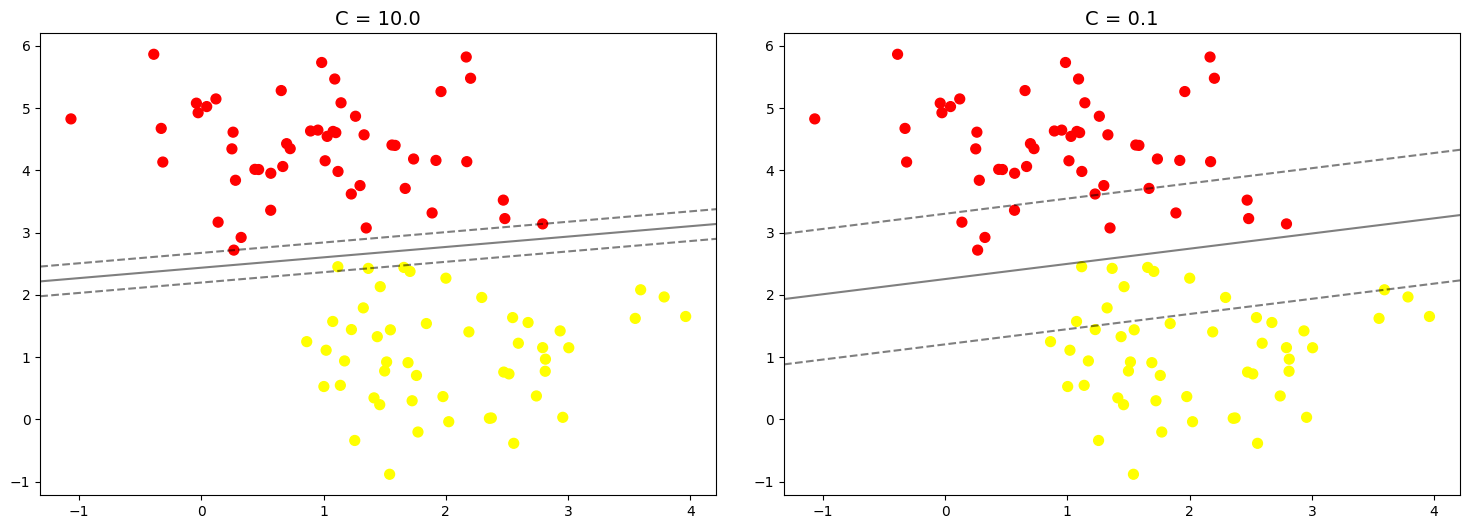

In [25]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Praktikum 4

## Unduh Dataset

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Inspeksi Citra Wajah

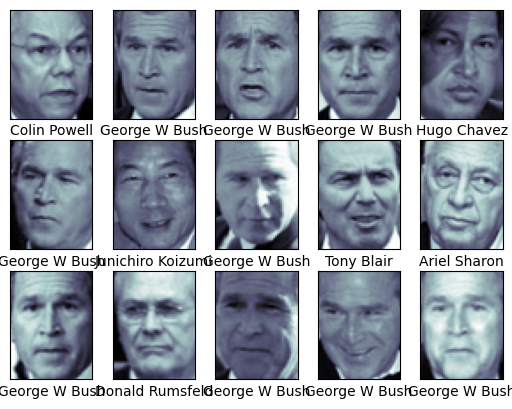

In [27]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Pra Pengolahan Data

In [28]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Split Data

In [29]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Pembuatan Model + Tunning

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 2s, sys: 114 ms, total: 2min 2s
Wall time: 1min 21s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [31]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

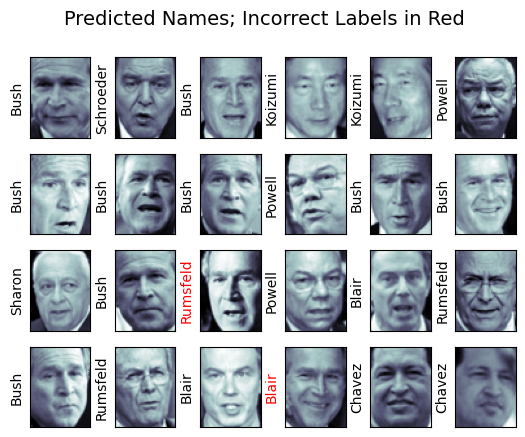

In [32]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Cek Performansi

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

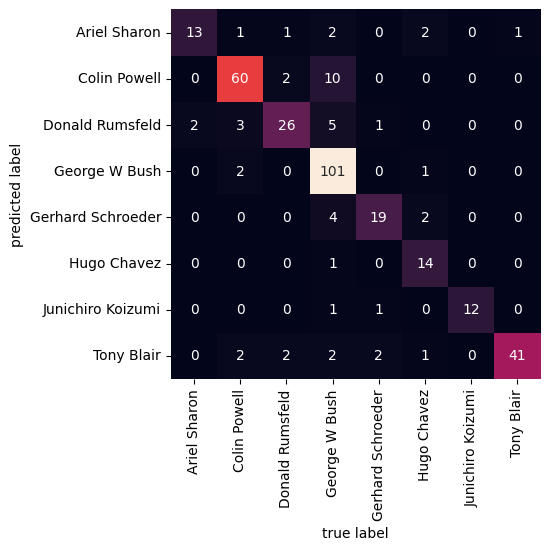

In [34]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 5

## Import Library

In [43]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [44]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/ML_3G_21/images/images/training/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/ML_3G_21/images/images/test/"

## Load Data dan Visualisasikan

In [45]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [46]:
# Load training data
train_img = load_dataset(train_dir)

In [47]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[75, 57, 47],
         [60, 42, 32],
         [16,  0,  0],
         ...,
         [38, 19, 13],
         [40, 25, 18],
         [45, 35, 26]],
 
        [[32, 15,  7],
         [13,  0,  0],
         [17,  0,  0],
         ...,
         [19,  2,  0],
         [18,  7,  1],
         [19, 10,  1]],
 
        [[66, 53, 45],
         [35, 22, 13],
         [57, 44, 36],
         ...,
         [45, 32, 26],
         [37, 30, 24],
         [28, 25, 16]],
 
        ...,
 
        [[61, 26, 24],
         [63, 28, 26],
         [79, 45, 43],
         ...,
         [63, 34, 38],
         [66, 35, 43],
         [22,  0,  0]],
 
        [[50, 15, 11],
         [59, 26, 21],
         [67, 34, 29],
         ...,
         [56, 30, 33],
         [33,  6, 13],
         [31,  4, 11]],
 
        [[48, 15,  8],
         [40,  7,  0],
         [39,  6,  0],
         ...,
         [38, 13, 16],
         [40, 15, 21],
         [62, 37, 43]]], dtype=uint8),
 'night')

In [48]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 60
(614, 857, 3)


In [49]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: day


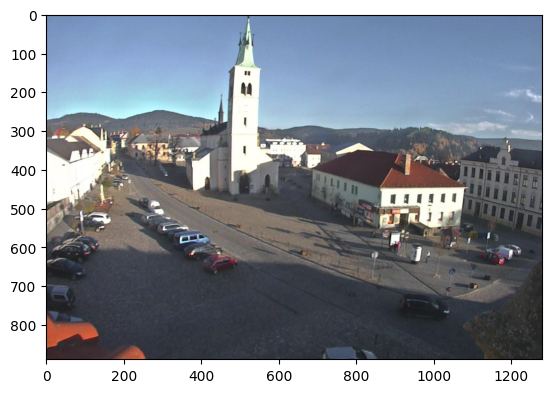

In [50]:
random_img_viz(train_img)

## Pra Pengolahan Data

In [51]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [52]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [53]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [54]:
train_std_img_list = preprocess(train_img)

In [55]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 106
(600, 1100, 3)


## Ekstraksi Fitur

In [56]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 165
Avg Brighness: 123.2517


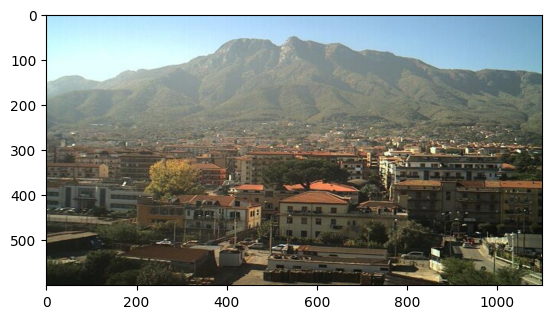

In [57]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Klasifikasi dengan Metode Threshold

In [58]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 109
Actual label: 0
Predicted label: 0


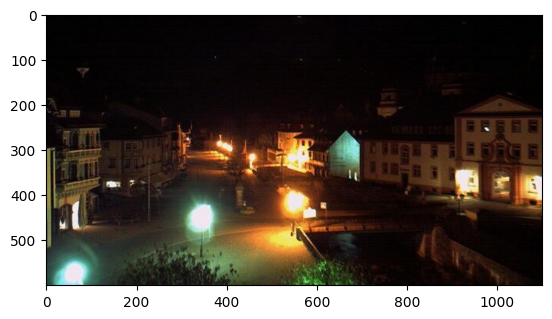

In [59]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Evaluasi Manual

In [60]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [61]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [62]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Klasifikasi dengan SVM

### Alternatif - Membuat Feature Vectors.

In [63]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [64]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,96.837845,0.0
1,48.869411,0.0
2,85.889741,0.0
3,97.690179,0.0
4,84.335327,0.0


In [65]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,37.642245,0.0
1,111.300176,0.0
2,26.318068,0.0
3,87.567647,0.0
4,90.377047,0.0


### Buat Model SVM

In [66]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

### Evaluasi

In [67]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# TUGAS PRAKTIKUM

## INPUT

In [68]:
import os, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Load voice.csv

In [70]:
VOICE_CANDIDATES = [
    "/content/drive/MyDrive/Colab Notebooks/ML_3G_21/voice_9.csv",
]
voice_path = next((p for p in VOICE_CANDIDATES if os.path.exists(p)), None)
if voice_path is None:
    raise FileNotFoundError("voice.csv tidak ditemukan. Upload ke /mnt/data atau /content terlebih dahulu.")

df = pd.read_csv(voice_path).dropna().copy()

# Deteksi kolom label (paling umum: 'label'/'gender')
label_col = None
for cand in ["label", "gender", "class", "target"]:
    if cand in df.columns:
        label_col = cand; break
if label_col is None:
    obj_cols = [c for c in df.columns if df[c].dtype == "object"]
    if len(obj_cols) == 1:
        label_col = obj_cols[0]
    else:
        raise ValueError(f"Tidak bisa menebak kolom label. Kolom: {list(df.columns)}")

le = LabelEncoder()
y = le.fit_transform(df[label_col].values)
X = df.drop(columns=[label_col]).values

## StandardScaler + SVC

In [71]:
def evaluate_svm(X, y, test_size=0.30, kernel="linear", degree=3, C=1.0, gamma="scale"):
    """
    Poin: split -> scaling -> train SVC -> akurasi
    - test_size: 0.30 (70:30) / 0.20 (80:20)
    - kernel: 'linear' | 'poly' | 'rbf'
    - degree: khusus 'poly'
    - C, gamma: khusus 'rbf'
    """
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    params = {"kernel": kernel}
    if kernel == "poly":
        params["degree"] = degree
    if kernel == "rbf":
        params["C"] = C
        params["gamma"] = gamma
    model = Pipeline([("scaler", StandardScaler()), ("svc", SVC(**params))])
    model.fit(Xtr, ytr)
    acc = accuracy_score(yte, model.predict(Xte))
    return acc


## Rekap akurasi semua kombinasi

In [72]:
splits = {"70:30": 0.30, "80:20": 0.20}
kernels = ["linear", "poly", "rbf"]
rows = []
for sname, ts in splits.items():
    for k in kernels:
        acc = evaluate_svm(X, y, test_size=ts, kernel=k, degree=3, C=1.0, gamma="scale")
        rows.append({"split": sname, "kernel": k, "accuracy": acc})
results_df = pd.DataFrame(rows).sort_values(["split", "kernel"]).reset_index(drop=True)
print("=== Rekap Akurasi — voice.csv ===")
display(results_df) if "display" in globals() else print(results_df)
results_df.to_csv("svm_voice_results_simple.csv", index=False)

=== Rekap Akurasi — voice.csv ===
   split  kernel  accuracy
0  70:30  linear  0.978970
1  70:30    poly  0.960042
2  70:30     rbf  0.983176
3  80:20  linear  0.974763
4  80:20    poly  0.955836
5  80:20     rbf  0.982650
